In [13]:
!git clone https://github.com/sujanjoejacob/Text-mining-with-Simpsons-Data.git

fatal: destination path 'Text-mining-with-Simpsons-Data' already exists and is not an empty directory.


In [14]:
!unzip ./Text-mining-with-Simpsons-Data/simpsons_script_lines.csv.zip

Archive:  ./Text-mining-with-Simpsons-Data/simpsons_script_lines.csv.zip
replace simpsons_script_lines.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: simpsons_script_lines.csv  


In [15]:
import pandas as pd

df = pd.read_csv('simpsons_script_lines.csv', quoting=True, error_bad_lines=False)

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

In [16]:
df.shape

(158248, 13)

In [17]:
df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0


In [31]:
sentenses = [s.split(" ") for s in df.dropna()['normalized_text'].values]
sentenses[0:2]

[['no',
  'actually',
  'it',
  'was',
  'a',
  'little',
  'of',
  'both',
  'sometimes',
  'when',
  'a',
  'disease',
  'is',
  'in',
  'all',
  'the',
  'magazines',
  'and',
  'all',
  'the',
  'news',
  'shows',
  'its',
  'only',
  'natural',
  'that',
  'you',
  'think',
  'you',
  'have',
  'it'],
 ['wheres', 'mr', 'bergstrom']]

In [34]:
from gensim.models import Word2Vec

model = Word2Vec(sentenses, min_count=1)
print(model)
words = list(model.wv.vocab)
print(len(words), words[0:10])
print(model['sentence'])
model.save('model.bin')
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=46773, size=100, alpha=0.025)
46773 ['no', 'actually', 'it', 'was', 'a', 'little', 'of', 'both', 'sometimes', 'when']
[ 0.11860047 -0.11308699  0.2089548  -0.1997672   0.05972252 -0.11010519
  0.0078149  -0.20930247  0.05754618 -0.01237272 -0.10217953  0.22630647
  0.20346554 -0.25471455 -0.10823814 -0.25074488 -0.15897574  0.1630815
 -0.01728024  0.21648224  0.00058231  0.15442707  0.06924866 -0.11871315
  0.13193473  0.09692167 -0.09388937 -0.02825373  0.26012078 -0.0660207
 -0.00719166 -0.01806099  0.04024384 -0.03251599 -0.09355415 -0.00902673
  0.3455523   0.11393613  0.01767574  0.05986839 -0.13948053 -0.01533545
  0.06976634  0.12654558 -0.14429347  0.17133887  0.01265594 -0.30924624
  0.2468032   0.06477258 -0.06929696 -0.18963452  0.04179445  0.06411827
 -0.09699567  0.05967104  0.26557744  0.23065454  0.26726332  0.12133525
  0.15393749 -0.23244247 -0.04735685  0.03555647  0.04443513 -0.21428397
 -0.2883661  -0.0809309  -0.05394973  0.03599432  0.13323253 -0.01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Word2Vec(vocab=46773, size=100, alpha=0.025)


In [44]:
top_words = model.wv.index2entity[:1000]
print(len(top_words), top_words[0:10])
X = model[top_words]

1000 ['the', 'you', 'i', 'a', 'to', 'and', 'of', 'it', 'that', 'my']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

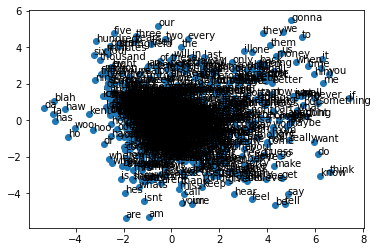

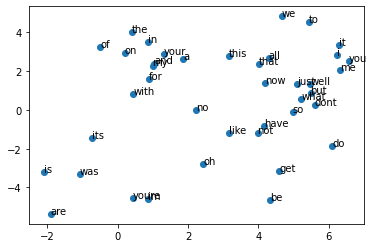

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(top_words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

plt.scatter(result[:40, 0], result[:40, 1])
for i, word in enumerate(top_words[0:40]):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [55]:
print(f"homer - marge + bart = {model.wv.most_similar(positive=['homer', 'bart'], negative=['marge'], topn=3)}")
print(f"bart - lisa + school = {model.wv.most_similar(positive=['bart', 'school'], negative=['lisa'], topn=3)}")
print(f"marge - homer + home = {model.wv.most_similar(positive=['marge', 'home'], negative=['homer'], topn=3)}")

homer - marge + bart = [('lisa', 0.8437877893447876), ('grampa', 0.694715142250061), ('milhouse', 0.6857472658157349)]
bart - lisa + school = [('house', 0.7863197326660156), ('bar', 0.7641056776046753), ('church', 0.7614008188247681)]
marge - homer + home = [('back', 0.8108333349227905), ('sleep', 0.7561269998550415), ('bed', 0.7277718186378479)]


In [54]:
from gensim.models import KeyedVectors

word_vectors = model.wv
word_vectors.save('vectors.kv')
model1 = KeyedVectors.load('vectors.kv')
print(f"homer - marge + bart = {model1.most_similar(positive=['homer', 'bart'], negative=['marge'], topn=3)}")
print(f"bart - lisa + school = {model1.most_similar(positive=['bart', 'school'], negative=['lisa'], topn=3)}")
print(f"marge - homer + home = {model1.most_similar(positive=['marge', 'home'], negative=['homer'], topn=3)}")

homer - marge + bart = [('lisa', 0.8437877893447876), ('grampa', 0.694715142250061), ('milhouse', 0.6857472658157349)]
bart - lisa + school = [('house', 0.7863197326660156), ('bar', 0.7641056776046753), ('church', 0.7614008188247681)]
marge - homer + home = [('back', 0.8108333349227905), ('sleep', 0.7561269998550415), ('bed', 0.7277718186378479)]
